In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_error(sorted_data, x, p):
    n = len(sorted_data)
    li = np.searchsorted(sorted_data, x, side="left")
    ri = np.searchsorted(sorted_data, x, side="right")
    qi = int(p * n)
    if ri < qi:
        return (qi-ri)*1.0/n
    elif li > qi:
        return (li-qi)*1.0/n
    else:
        return 0.0
def calc_error(df, sorted_data):
    df["error"] = df.apply(
        lambda r: get_error(
            sorted_data, r["quantile_estimate"], r["q"],
        ),
        axis=1
    )
    return df

In [84]:
df = pd.read_csv("../javamsketch/results/normoutlier_point_1514662619.csv")
orig_data = pd.read_csv("../../datasets/norm_outlier.csv", usecols=[0])["0"]
sorted_data = np.sort(orig_data)
df = calc_error(df, sorted_data)
df.groupby(["sketch", "size_param"]).mean()

q  quantile_estimate   train_time  bound_size  trial  \
sketch    size_param                                                           
histogram 3.0         0.5          -0.011426    7096743.5    0.380035    0.5   
          5.0         0.5          -0.005713    7362749.5    0.380035    0.5   
          7.0         0.5          -0.005713    4990932.0    0.380035    0.5   
          10.0        0.5          -0.002819    4395680.5    0.380020    0.5   
          20.0        0.5          -0.002316    2644155.0    0.324817    0.5   
          40.0        0.5          -0.001993    3650635.0    0.187700    0.5   
          100.0       0.5          -0.002034    6044349.5    0.096207    0.5   
moment    3.0         0.5          -0.002324   10058719.0    0.000000    0.5   
          5.0         0.5          -0.002284    4061821.0    0.000000    0.5   
          7.0         0.5          -0.002334    9368937.0    0.000000    0.5   
          9.0         0.5          -0.002316    9985060.5    0.000000    0.5   
          11.0        0.5          -0.002499   10939361.0    0.000000    0.5   
sampling  10.0        0.5           0.217049   39543342.0    0.299675    0.5   
          100.0       0.5          -0.067119   45157030.0    0.094765    0.5   
          1000.0      0.5          -0.007109   32196075.5    0.029967    0.5   
          10000.0     0.5          -0.010172   30279701.5    0.009476    0.5   
spark_gk  5.0         0.5           3.390304  364436385.5    0.200000    0.5   
          10.0        0.5           1.990879  243103229.0    0.100000    0.5   
          20.0        0.5           1.347946  239737461.0    0.050000    0.5   
          50.0        0.5           0.666472  239473247.5    0.020000    0.5   
          100.0       0.5           0.679954  250764868.5    0.010000    0.5   
          300.0       0.5          -0.016798  241437991.0    0.003333    0.5   
tdigest   4.0         0.5          -0.002447  167177877.5    0.000000    0.5   
          8.0         0.5          -0.002526  169436452.5    0.000000    0.5   
          16.0        0.5          -0.002546  176477703.5    0.000000    0.5   
          32.0        0.5          -0.002171  208712730.0    0.000000    0.5   
          64.0        0.5          -0.002617  236343960.5    0.000000    0.5   
          128.0       0.5          -0.002678  264114481.5    0.000000    0.5   
yahoo     2.0         0.5           0.123433   92181447.0    0.821715    0.5   
          4.0         0.5          -0.020119   51187907.0    0.437036    0.5   
          8.0         0.5           0.246640   48974260.5    0.230986    0.5   
          16.0        0.5           0.034322   48749208.5    0.121454    0.5   
          32.0        0.5           0.014017   73543151.5    0.063587    0.5   
          64.0        0.5          -0.006130   55604984.0    0.033169    0.5   

                        space  query_time          n     error  
sketch    size_param                                            
histogram 3.0            36.0     27925.5  1000001.0  0.210361  
          5.0            52.0     13929.5  1000001.0  0.189194  
          7.0            68.0     14717.5  1000001.0  0.189194  
          10.0           92.0     26681.0  1000001.0  0.142932  
          20.0          172.0     21344.5  1000001.0  0.060968  
          40.0          332.0     17316.0  1000001.0  0.013540  
          100.0         812.0     23844.5  1000001.0  0.003404  
moment    3.0            40.0  59913426.5  1000001.0  0.000156  
          5.0            56.0   2276942.0  1000001.0  0.000386  
          7.0            72.0   5738139.5  1000001.0  0.000154  
          9.0            88.0   6458689.0  1000001.0  0.000145  
          11.0          104.0  52120528.0  1000001.0  0.000161  
sampling  10.0           88.0   6018968.5  1000001.0  0.086488  
          100.0         808.0    263758.0  1000001.0  0.025567  
          1000.0       8008.0    914060.0  1000001.0  0.011463  
          10000.0     80008.0   365229

In [17]:
df = pd.read_csv("../javamsketch/results/occupancy_point_1514663348.csv")
orig_data = pd.read_csv("../sampledata/occupancy_2.csv", usecols=[3])["CO2"]
sorted_data = np.sort(orig_data)
df = calc_error(df, sorted_data)
df.groupby(["sketch", "size_param"]).mean()

q  quantile_estimate  train_time  bound_size  trial  \
sketch    size_param                                                          
histogram 3.0         0.5         672.074093   1831120.0    0.575882    0.5   
          5.0         0.5         663.396633   1110412.0    0.291762    0.5   
          7.0         0.5         663.396633    622896.5    0.291762    0.5   
          10.0        0.5         690.086673    308004.0    0.214806    0.5   
          20.0        0.5         706.800157    339078.5    0.171114    0.5   
          40.0        0.5         705.832749    495550.5    0.085832    0.5   
          100.0       0.5         707.916772    354864.0    0.057592    0.5   
moment    3.0         0.5         712.133232   1479837.0    0.000000    0.5   
          5.0         0.5         708.562662    701152.5    0.000000    0.5   
          7.0         0.5         707.893684    663088.0    0.000000    0.5   
          9.0         0.5         706.683544    387345.5    0.000000    0.5   
          11.0        0.5         706.105540    181940.0    0.000000    0.5   
          13.0        0.5         707.055418    273569.0    0.000000    0.5   
          17.0        0.5         707.613645    349723.5    0.000000    0.5   
sampling  10.0        0.5         613.881746   3403975.0    0.299675    0.5   
          100.0       0.5         696.227183   1435116.0    0.094765    0.5   
          1000.0      0.5         707.595238   1471858.5    0.029967    0.5   
          10000.0     0.5         709.349603   1302353.0    0.009476    0.5   
spark_gk  5.0         0.5         870.988095  64972074.5    0.200000    0.5   
          10.0        0.5         763.242063  19389807.0    0.100000    0.5   
          20.0        0.5         732.658730  19592849.5    0.050000    0.5   
          50.0        0.5         712.348526  14345604.0    0.020000    0.5   
          100.0       0.5         717.785714  13648800.5    0.010000    0.5   
          300.0       0.5         700.850000  16479203.5    0.003333    0.5   
tdigest   4.0         0.5         713.837682  22182303.0    0.000000    0.5   
          8.0         0.5         709.396192  11553758.5    0.000000    0.5   
          16.0        0.5         709.436634  10799153.5    0.000000    0.5   
          32.0        0.5         708.108272  13983143.5    0.000000    0.5   
          64.0        0.5         708.164076  15029179.0    0.000000    0.5   
          128.0       0.5         708.275895  10434975.0    0.000000    0.5   
yahoo     2.0         0.5         672.587302  13955538.5    0.821715    0.5   
          4.0         0.5         649.339286   3283779.5    0.437036    0.5   
          8.0         0.5         720.623016   3229290.0    0.230986    0.5   
          16.0        0.5         732.898810   4983800.0    0.121454    0.5   
          32.0        0.5         732.740079   3316360.5    0.063587    0.5   
          64.0        0.5         703.684524   3141308.0    0.033169    0.5   

                        space  query_time        n     error  
sketch    size_param                                          
histogram 3.0            36.0     47250.0  20560.0  0.096642  
          5.0            52.0     15290.5  20560.0  0.088290  
          7.0            68.0     13935.5  20560.0  0.088290  
          10.0           92.0     10870.0  20560.0  0.055084  
          20.0          172.0     14074.0  20560.0  0.019740  
          40.0          332.0     71503.5  20560.0  0.016530  
          100.0         812.0     21022.5  20560.0  0.009292  
moment    3.0            40.0  66426907.5  20560.0  0.027789  
          5.0            56.0   1455824.5  20560.0  0.013260  
          7.0            72.0   1817446.5  20560.0  0.014348  
          9.0            88.0   1976134.5  20560.0  0.013389  
          11.0          104.0   2291074.0  20560.0  0.013223  
          13.0          120.0   3617927.0  20560.0  0.012338  
          17.0          152.0   7941064.0  20560.0  0.007486  
sampling  10.

In [18]:
df = pd.read_csv("../javamsketch/results/hepmass_point_1514663657.csv")
orig_data = pd.read_csv("../../datasets/hepmass.csv", header=None, usecols=[0])[0]
sorted_data = np.sort(orig_data)
df = calc_error(df, sorted_data)
df.groupby(["sketch", "size_param"]).mean()

q  quantile_estimate   train_time  bound_size  trial  \
sketch    size_param                                                           
histogram 3.0         0.5           2.757954   11935900.5    0.531254    0.5   
          5.0         0.5           2.998224    9656129.0    0.352525    0.5   
          7.0         0.5           2.999006    6110615.5    0.184471    0.5   
          10.0        0.5           2.999006    7206738.0    0.184471    0.5   
          20.0        0.5           2.998821    4890349.0    0.047290    0.5   
          40.0        0.5           2.998716    6933609.0    0.025059    0.5   
          100.0       0.5           2.998651    4888549.0    0.011737    0.5   
moment    3.0         0.5           2.998571   18220197.5    0.000000    0.5   
          5.0         0.5           2.998598    4361724.0    0.000000    0.5   
          7.0         0.5           2.998654    9582552.0    0.000000    0.5   
          9.0         0.5           2.998667    5251998.0    0.000000    0.5   
          11.0        0.5           2.998663   11147013.0    0.000000    0.5   
          13.0        0.5           2.998664   10446889.0    0.000000    0.5   
          17.0        0.5           2.998663   12387175.5    0.000000    0.5   
sampling  10.0        0.5           2.611135   50597081.5    0.299675    0.5   
          100.0       0.5           3.013424   46616420.5    0.094765    0.5   
          1000.0      0.5           3.016356   29461451.0    0.029967    0.5   
          10000.0     0.5           3.000260   29592843.5    0.009476    0.5   
spark_gk  5.0         0.5           2.932375  347162297.0    0.200000    0.5   
          10.0        0.5           2.914605  248487799.0    0.100000    0.5   
          20.0        0.5           2.967784  244169424.0    0.050000    0.5   
          50.0        0.5           2.971102  244691605.0    0.020000    0.5   
          100.0       0.5           2.988922  238330742.5    0.010000    0.5   
          300.0       0.5           2.993101  236023832.0    0.003333    0.5   
tdigest   4.0         0.5           2.999192  171792490.5    0.000000    0.5   
          8.0         0.5           2.998523  169240224.0    0.000000    0.5   
          16.0        0.5           2.998578  173834450.5    0.000000    0.5   
          32.0        0.5           2.998549  193938679.0    0.000000    0.5   
          64.0        0.5           2.998558  230916335.5    0.000000    0.5   
          128.0       0.5           2.998577  251515232.0    0.000000    0.5   
yahoo     2.0         0.5           2.649134   87278651.0    0.821715    0.5   
          4.0         0.5           3.012284   48950839.0    0.437036    0.5   
          8.0         0.5           2.912304   39591894.0    0.230986    0.5   
          16.0        0.5           3.020073   44053480.5    0.121454    0.5   
          32.0        0.5           3.028012   87922834.5    0.063587    0.5   
          64.0        0.5           2.993106   57472396.0    0.033169    0.5   

                        space  query_time         n     error  
sketch    size_param                                           
histogram 3.0            36.0     38441.5  999998.0  0.123660  
          5.0            52.0     18779.0  999998.0  0.022027  
          7.0            68.0     17765.0  999998.0  0.011771  
          10.0           92.0     24951.0  999998.0  0.011771  
          20.0          172.0     22462.0  999998.0  0.000878  
          40.0          332.0     29320.0  999998.0  0.000196  
          100.0         812.0     56125.0  999998.0  0.000071  
moment    3.0            40.0  52332290.5  999998.0  0.003554  
          5.0            56.0    969400.0  999998.0  0.000547  
          7.0            72.0   1292866.0  999998.0  0.000426  
          9.0            88.0   1401618.5  999998.0  0.000704  
          11.0          104.0   1001836.5  999998.0  0.000237  
          13.0          120.0   1217169.0  999998.0  0.000275  
          17.0         

In [19]:
df = pd.read_csv("../javamsketch/results/logmilan_merge_1514658496.csv")
orig_df = pd.read_csv("../../datasets/l_internet-mi-2013-11-01_09.csv")
orig_data = orig_df["l_internet"]
sorted_data = np.sort(orig_data)
df = calc_error(df, sorted_data)
df.groupby(["sketch", "size_param"]).mean()

q  quantile_estimate    train_time    merge_time  \
sketch    size_param                                                       
histogram 3.0         0.5           1.599061  1.964932e+08  1.232481e+07   
          5.0         0.5           0.799531  1.544901e+08  8.597394e+06   
          7.0         0.5           0.375501  1.413591e+08  1.156893e+07   
          10.0        0.5           0.481556  1.438630e+08  1.663878e+07   
          20.0        0.5           0.449542  1.462424e+08  3.641737e+07   
          40.0        0.5           0.459181  1.572254e+08  7.782268e+07   
          100.0       0.5           0.459893  1.661249e+08  1.934051e+08   
moment    3.0         0.5           0.498105  1.216331e+08  5.938216e+06   
          5.0         0.5           0.478992  1.515212e+08  4.235630e+06   
          7.0         0.5           0.470797  1.581872e+08  4.588594e+06   
          9.0         0.5           0.457210  2.051312e+08  5.141417e+06   
          11.0        0.5           0.459837  2.462072e+08  5.697789e+06   
          13.0        0.5           0.462067  2.843824e+08  6.125558e+06   
sampling  10.0        0.5           0.626090  7.709505e+08  6.903483e+07   
          100.0       0.5           0.086847  2.605504e+08  6.325070e+08   
          1000.0      0.5           0.446916  2.500155e+08  6.281411e+08   
          10000.0     0.5           0.465220  2.672933e+08  6.333627e+08   
spark_gk  5.0         0.5           0.381568  3.503236e+09  3.469173e+08   
          10.0        0.5           1.335001  3.225174e+09  6.349078e+08   
          20.0        0.5           1.834082  3.804589e+09  1.105299e+09   
          50.0        0.5           2.478742  5.090237e+09  1.830659e+09   
          100.0       0.5           2.391375  5.822139e+09  3.137828e+09   
          300.0       0.5           2.604461  5.842114e+09  7.299276e+09   
tdigest   4.0         0.5           0.459521  5.470335e+09  1.323201e+09   
          8.0         0.5           0.460688  6.244530e+09  1.947360e+09   
          16.0        0.5           0.461442  7.559398e+09  3.141343e+09   
          32.0        0.5           0.460812  7.926246e+09  4.489207e+09   
          64.0        0.5           0.460037  7.777199e+09  5.600230e+09   
          128.0       0.5           0.459836  7.848790e+09  6.081293e+09   
yahoo     2.0         0.5           0.930695  1.076335e+09  1.141534e+08   
          4.0         0.5           0.535853  1.057222e+09  1.544691e+08   
          8.0         0.5           0.580162  9.449187e+08  1.926163e+08   
          16.0        0.5           0.555691  8.739910e+08  2.888919e+08   
          32.0        0.5           0.452130  7.622201e+08  6.353195e+08   
          64.0        0.5           0.436667  2.449429e+08  1.111302e+09   

                      bound_size  trial    space  query_time         n  \
sketch    size_param                                                     
histogram 3.0           0.387251    4.5     36.0     35077.9  243082.0   
          5.0           0.387251    4.5     52.0     32322.1  243082.0   
          7.0           0.386158    4.5     68.0     32533.5  243082.0   
          10.0          0.230892    4.5     92.0     32177.3  243082.0   
          20.0          0.128772    4.5    172.0     29561.1  243082.0   
          40.0          0.071255    4.5    332.0     31958.9  243082.0   
          100.0         0.036973    4.5    812.0     49405.8  243082.0   
moment    3.0           0.000000    4.5     40.0  10293042.5  243082.0   
          5.0           0.000000    4.5     56.0    860114.0  243082.0   
          7.0           0.000000    4.5     72.0    598653.6  243082.0   
          9.0           0.000000    4.5     88.0    747555.2  243082.0   
          11.0          0.000000    4.5    104.0    592157.8  243082.0   
          13.0          0.000000    4.5    120.0    528673.6  243082.0   
sampling  10.0          0.299675    4.5     88.0    710574.8  243082.0   
          100.0         0.0

# Big Plot

In [12]:
colormap = {
    "moment": "C0",
    "tdigest": "C1",
    "yahoo": "C2",
    "spark_gk": "C3",
    "histogram": "C4",
    "sampling": "C5",
}
markers = {
    "moment": "x",
    "tdigest": "^",
    "yahoo": "s",
    "spark_gk": "+",
    "histogram": "D",
    "sampling": "o",
}
alg_display_name = {
    "moment": "M-Sketch",
    "tdigest": "T-Digest",
    "yahoo": "Merge12",
    "spark_gk": "GK",
    "histogram": "EW-Histogram",
    "sampling": "Sampling",
}

In [4]:
orig_df = pd.read_csv("../../datasets/l_internet-mi-2013-11.csv")
orig_data = orig_df["l_internet"]
sorted_data = np.sort(orig_data)

In [5]:
df = pd.read_csv("../javamsketch/results/logmilan_merge_1515112890.csv")

In [6]:
n = len(orig_data) / 100

In [7]:
dft = df[df["trial"] > 0].groupby(
    ["sketch", "size_param", "q"]
)[
    "quantile_estimate", "train_time", 
    "query_time", "space", "merge_time",
    "bound_size"
].mean()
dft = dft.reset_index()
dft["error"] = dft.apply(
    lambda r: get_error(
        sorted_data, r["quantile_estimate"], r["q"],
    ),
    axis=1
)
dft["rerror"] = dft["error"] / np.minimum(dft["q"],(1-dft["q"]))
dfg = dft.groupby([
    "sketch", "size_param"
])[
    "train_time","merge_time", "query_time", 
    "space", "error", "rerror", "bound_size"
  ].mean()
dfs = dfg.reset_index().sort_values(["size_param"])

In [8]:
dfs = dfs[
    (dfs["sketch"]!="sampling") |
    (dfs["size_param"] > 10.0)
]

In [9]:
sketches = ["moment", "tdigest", "yahoo", "sampling", "spark_gk", "histogram"]

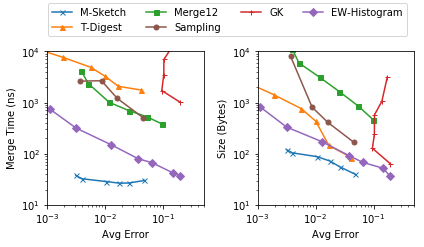

In [48]:
f, axs = plt.subplots(1,2, figsize=(6,3))

ax = axs[0]
for alg in sketches:
    c_df = dfs[dfs["sketch"] == alg]
    ax.loglog(
        c_df["error"], 
        (c_df["merge_time"])/n,
        label=alg_display_name[alg],
        marker=markers[alg],
        color=colormap[alg],
        markersize=5
    )
ax.set_xlabel("Avg Error")
ax.set_ylabel("Merge Time (ns)")
ax.set_xlim(0.001, 0.5)
ax.set_ylim(10, 10000)

ax = axs[1]
lines = []
labels = []
for alg in sketches:
    c_df = dfs[dfs["sketch"] == alg]
    l, = ax.loglog(
        c_df["error"],
        c_df["space"], 
        label=alg_display_name[alg],
        marker=markers[alg],
        color=colormap[alg],
        markersize=5,
    )
    lines.append(l)
    labels.append(alg_display_name[alg])

ax.set_xlabel("Avg Error")
ax.set_ylabel("Size (Bytes)")
ax.set_xlim(0.001, 0.5)
ax.set_ylim(10, 10**4)

lgd = f.legend(
    lines, labels,
    bbox_to_anchor=(0.10, 1.05, 1., .102), ncol=4, loc=2
)
f.tight_layout()
plt.savefig("logmilan_merge_alt.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

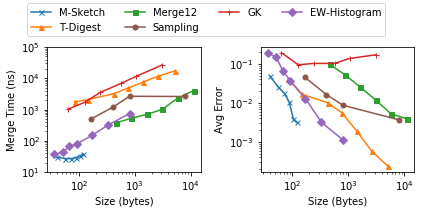

In [23]:
f, axs = plt.subplots(1,2, figsize=(6,2.6))

ax = axs[0]
for alg in sketches:
    c_df = dfs[dfs["sketch"] == alg]
    ax.loglog(
        c_df["space"], 
        (c_df["merge_time"])/n,
        label=alg_display_name[alg],
        marker=markers[alg],
        color=colormap[alg],
        markersize=5,
    )
ax.set_xlabel("Size (bytes)")
ax.set_ylabel("Merge Time (ns)")
ax.set_ylim(10,10**5)

ax = axs[1]
lines = []
labels = []
for alg in sketches:
    c_df = dfs[dfs["sketch"] == alg]
    l, = ax.loglog(
        c_df["space"],
        c_df["error"], 
        label=alg_display_name[alg],
        marker=markers[alg],
        color=colormap[alg],
        markersize=5,
    )
    lines.append(l)
    labels.append(alg_display_name[alg])

ax.set_xlabel("Size (Bytes)")
ax.set_ylabel("Avg Error")

lgd = f.legend(
    lines, labels,
    bbox_to_anchor=(0.05, 1.05, 1., .102), ncol=4, loc=2
)
f.tight_layout()
plt.savefig("logmilan_merge.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [19]:
10000*24000000/100*1e-9

2.4000000000000004

In [78]:
len(orig_data)

24308139